In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
versions = ['pure_python', 'numba_accelarated_python', 'pure_julia']
chunks = []
for version in versions:
    try:
        df = pd.read_csv(f'./{version}.csv')
        df['version'] = version
        chunks.append(df)
    except Exception as e:
        print(e)
data = pd.concat(chunks, sort=False)
data.head()

,n_nodes,elapsed,version
0,1,0.000092,pure_python
1,1,0.000060,pure_python
2,1,0.000004,pure_python
3,1,0.000002,pure_python
4,1,0.000053,pure_python


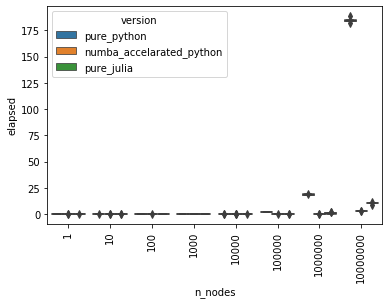

In [17]:
ax = sns.boxplot(data=data, y='elapsed', x='n_nodes', hue='version')
# ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


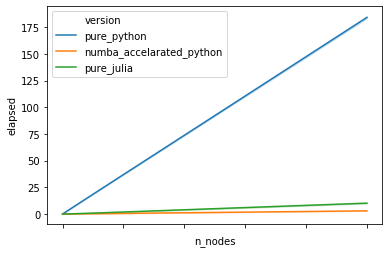

In [4]:
ax = sns.lineplot(data=data, y='elapsed', x='n_nodes', hue='version')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


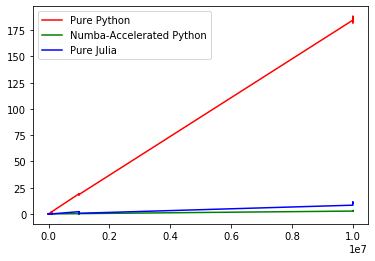

In [25]:
plt.plot("n_nodes", "elapsed", data=data.loc[data['version'] == 'pure_python'], color='r')
plt.plot("n_nodes", "elapsed", data=data.loc[data['version'] == 'numba_accelarated_python'], color='g')
plt.plot("n_nodes", "elapsed", data=data.loc[data['version'] == 'pure_julia'], color='b')
plt.legend(['Pure Python', 'Numba-Accelerated Python', 'Pure Julia'])
plt.show()

In [5]:
metric_names = ['mean', 'median', 'std']
data_aggregated = data.groupby(['version', 'n_nodes']).agg(['median', 'mean', 'std'])
# data_aggregated = pd.pivot_table(data_aggregated, values=metric_names,
#                                 index=['n_nodes'], columns=['version'], aggfunc='mean')
data_aggregated = data_aggregated['elapsed'].reset_index()
data_aggregated.head()

,version,n_nodes,median,mean,std
0,numba_accelarated_python,1,0.000116,0.000126,0.000028
1,numba_accelarated_python,10,0.000156,0.000182,0.000094
2,numba_accelarated_python,100,0.000170,0.000188,0.000045
3,numba_accelarated_python,1000,0.000634,0.000624,0.000109
4,numba_accelarated_python,10000,0.004079,0.003872,0.000532


In [14]:
data_aggregated.dtypes

version     object
n_nodes      int64
median     float64
mean       float64
std        float64
dtype: object

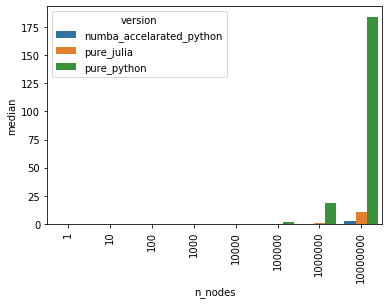

In [16]:
ax = sns.barplot(data=data_aggregated, y='median', x='n_nodes', hue='version')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Improvement Ratio agains Pure-Python

In [9]:
data_aggregated_pivot = pd.pivot_table(data_aggregated, values=['median', 'mean'],
                                index=['n_nodes'], columns=['version'], aggfunc='mean') 
data_aggregated_pivot.head()

mean                         \
version numba_accelarated_python pure_julia pure_python   
n_nodes                                                   
1                       0.000126   0.000001    0.000045   
10                      0.000182   0.000007    0.000182   
100                     0.000188   0.000083    0.002071   
1000                    0.000624   0.000984    0.020030   
10000                   0.003872   0.004212    0.184812   

                          median                         
version numba_accelarated_python pure_julia pure_python  
n_nodes                                                  
1                       0.000116   0.000001    0.000052  
10                      0.000156   0.000005    0.000174  
100                     0.000170   0.000080    0.002032  
1000                    0.000634   0.000974    0.019790  
10000                   0.004079   0.003363    0.177344

In [13]:
data_aggregated_mean = data_aggregated_pivot['mean']
data_aggregated_mean['ratio_numba_accelarated_python'] = (data_aggregated_mean['pure_python'] /
                                                          data_aggregated_mean['numba_accelarated_python'])

data_aggregated_mean['ratio_pure_julia'] = (data_aggregated_mean['pure_python'] /
                                         data_aggregated_mean['pure_julia'])
data_aggregated_mean.drop(['numba_accelarated_python', 'pure_python', 'pure_julia'], axis=1, inplace=True)
data_aggregated_mean

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

version,ratio_numba_accelarated_python,ratio_pure_julia
n_nodes,,
1,0.359750,30.553304
10,1.003936,26.752421
100,10.987854,24.859951
1000,32.107009,20.360961
10000,47.735581,43.873984
100000,67.213224,85.207159
1000000,66.652069,21.692636
10000000,62.228357,18.094464


In [ ]:
sns.barplot(data=data_aggregated_mean.reset_index(), x='n_nodes')